
## Autoregressive Integrated Moving Averages (ARIMA)

and 


## Seasonal Autoregressive Integrated Moving Averages (SARIMA)



In [1]:
import numpy as np
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.api import qqplot
%matplotlib inline

from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
import itertools
from statsmodels.tsa.arima_model import ARIMA

In [3]:
df=pd.read_csv("missing_value_handled.csv")
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1


In [4]:
df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
dtype: object

In [5]:
df= df[df['Store'] == 2]
df=df[["Date","Sales"]]
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()

,Sales
Date,
2015-07-31,6064
2015-07-30,5567
2015-07-29,6402
2015-07-28,5671
2015-07-27,6627


In [6]:
df.describe()

,Sales
count,942.000000
mean,4122.991507
std,2363.628674
min,0.000000
25%,2806.750000
50%,4395.500000
75%,5804.500000
max,10682.000000


<AxesSubplot:xlabel='Date'>

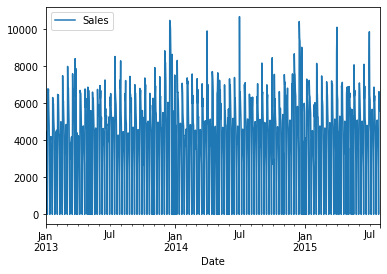

In [7]:
df.plot()

<AxesSubplot:xlabel='Date'>

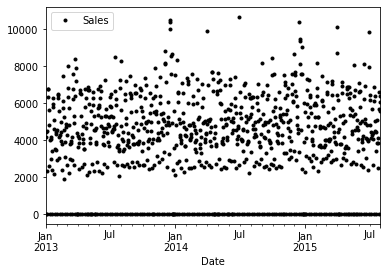

In [8]:
df.plot(style='k.')

In [9]:
df.shape

(942, 1)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

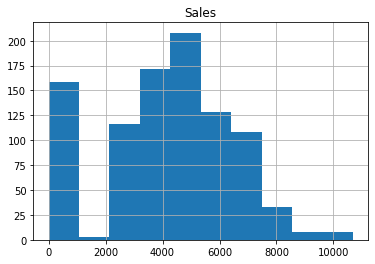

In [10]:
df.hist()

<AxesSubplot:ylabel='Density'>

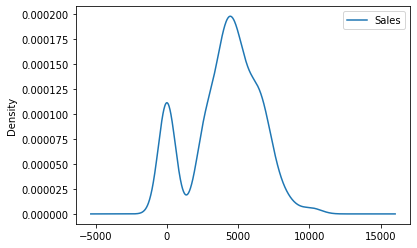

In [11]:
df.plot(kind='kde')

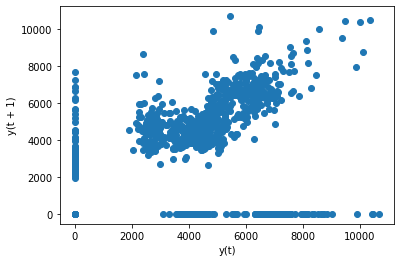

In [12]:
lag_plot(df)
plt.show()

In [13]:
# smoothing
moving_average_df=df.rolling(window=20).mean()  
moving_average_df

,Sales
Date,
2015-07-31,NaN
2015-07-30,NaN
2015-07-29,NaN
2015-07-28,NaN
2015-07-27,NaN
...,...
2013-01-05,3975.80
2013-01-04,3945.45
2013-01-03,3854.70


<AxesSubplot:xlabel='Date'>

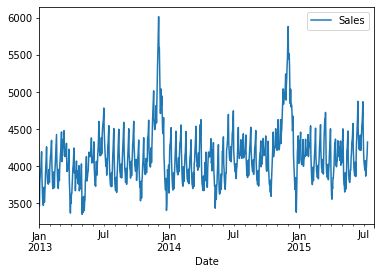

In [14]:
moving_average_df.plot()

In [15]:
sm.stats.durbin_watson(df) # correlation

array([0.39158623])

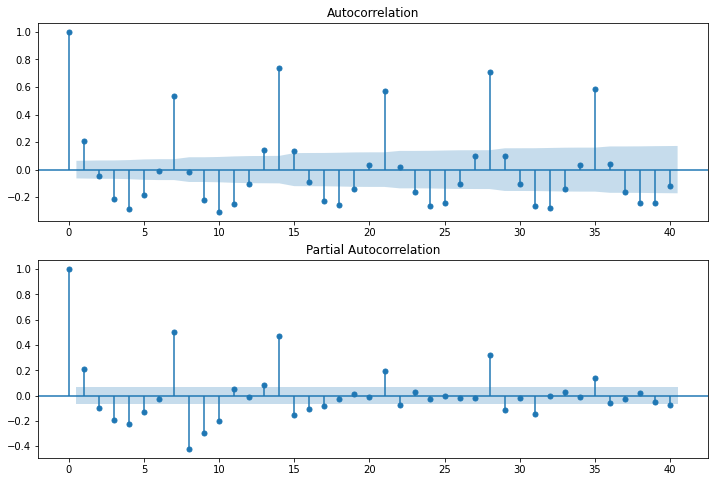

In [16]:
# acf and pacf plots
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

In [17]:
# Test for stationarity

test_result=adfuller(df['Sales'])
test_result

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    print('Critical Values:')
    for key, value in result[4].items():
        print(key, value)
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(df['Sales'])

ADF Test Statistic : -6.218236994150324
p-value : 5.300862570845989e-08
#Lags Used : 21
Number of Observations Used : 920
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [18]:
training_data,test_data=train_test_split(df)

In [19]:
# ARIMA
arima= ARIMA(training_data,order=(1,1,1))
model=arima.fit()
model.summary()

/home/abhash/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/abhash/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no asso

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  705
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6470.442
Method:                       css-mle   S.D. of innovations           2331.759
Date:                Wed, 30 Sep 2020   AIC                          12948.885
Time:                        17:27:50   BIC                          12967.117
Sample:                             1   HQIC                         12955.930
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3131      0.436     -0.718      0.473      -1.168       0.542
ar.L1.D.Sales     0.0127      0.038      0.336      0.737      -0.061       0.087
ma.L1.D.Sales    -1.0000      0.004   -259.522      0.000      -1.008      -0.992
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           78.9383           +0.0000j           78.9383            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
model.aic

12948.884558847098

<ipython-input-21-9d5a1cb93b0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predict']=pred


<AxesSubplot:xlabel='Date'>

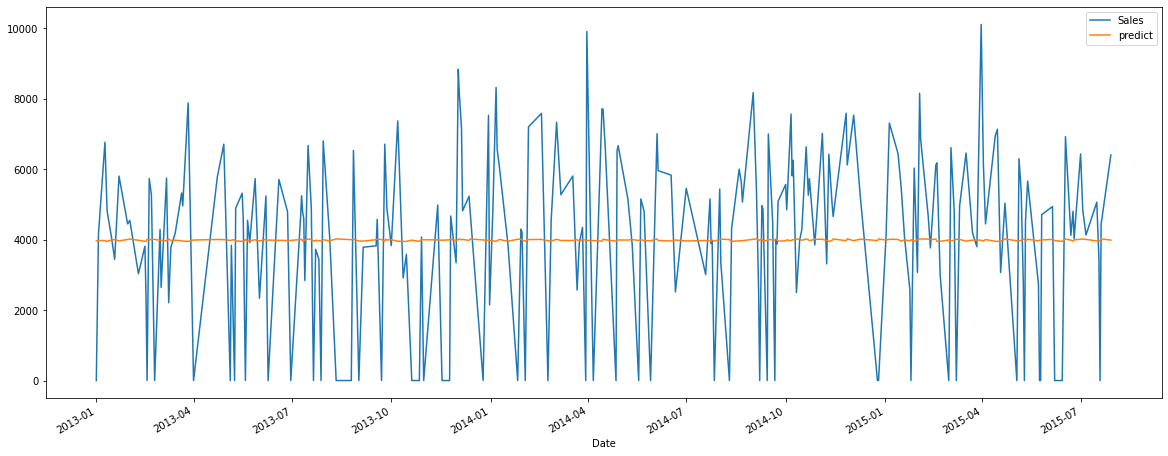

In [21]:
pred= model.forecast(steps=236)[0]
test_data['predict']=pred
test_data[['Sales','predict']].plot(figsize=(20,8))

In [22]:
# SARIMA
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2

pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()

/home/abhash/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  warnings.warn('No frequency information was'
/home/abhash/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/abhash/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  warnings.warn('No frequency information was'
/home/abhash/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  942
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8541.663
Date:                            Wed, 30 Sep 2020   AIC                          17093.327
Time:                                    17:27:55   BIC                          17117.498
Sample:                                         0   HQIC                         17102.546
                                            - 942                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2014      0.032      6.352      0.000       0.139       0.264
ma.L1         -1.0000      0.717     -1.396      0.163      -2.404       0.404
ar.S.L12      -0.0826      0.042     -1.980      0.048      -0.164      -0.001
ma.S.L12      -0.9991      0.720     -1.388      0.165      -2.410       0.412
sigma2      5.329e+06   1.35e-07   3.96e+13      0.000    5.33e+06    5.33e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                80.19
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.72
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.46e+31. Standard errors may be unstable.
"""

<ipython-input-24-a53301f91105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['forecast']=results.predict(start=90,end=500,dynamic=True)


<AxesSubplot:xlabel='Date'>

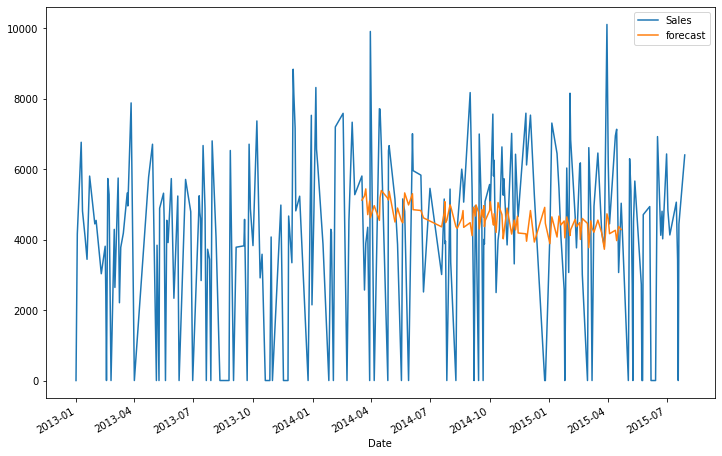

In [24]:
test_data['forecast']=results.predict(start=90,end=500,dynamic=True)
test_data[['Sales','forecast']].plot(figsize=(12,8))